In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

print(tf.VERSION)
print(tf.keras.__version__)

1.13.1
2.2.4-tf


In [2]:
data = np.loadtxt('./dataset/vectors.txt')
genres = np.loadtxt('./dataset/genre.txt', dtype=np.str, delimiter=',')

In [3]:
encoder = LabelBinarizer()
def onehot_labels(labels):
    return encoder.fit_transform(labels)
    
def onehot2str(onehot):
    return encoder.inverse_transform(np.array([onehot]))[0]

In [4]:
# source: https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # one hot to index
    y_true = [np.where(r==1)[0][0] for r in y_true]
    # y_pred are already indexes
    
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = np.unique(classes)
    classes = classes[unique_labels(y_true, y_pred)]
    classes = [c[0:10] if len(c) > 10 else c for c in classes]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots(figsize=(10, 8))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

### Experiment 1: Genre

In [5]:
np.unique(genres)

array(['cantata', 'concerto', 'concerto grosso', 'duo', 'mass', 'motet',
       'prelude', 'prelude and fugue', 'quartet', 'symphony'],
      dtype='<U17')

In [6]:
labels_1hot = onehot_labels(genres)
    
onehot2str(labels_1hot[0])

'symphony'

In [7]:
labels_1hot.shape

(438, 10)

In [8]:
num_input = data.shape[1]
num_output = labels_1hot.shape[1]

num_input, num_output

(100, 10)

In [9]:
def create_model():
    model = tf.keras.Sequential()
    
    model.add(layers.Dense(100, activation='relu', input_shape=(num_input,)))
    model.add(layers.Dense(100, activation='relu'))
    model.add(layers.Dense(num_output, activation='sigmoid'))

    model.compile(optimizer=tf.train.AdamOptimizer(0.01),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

In [10]:
neural_network = KerasClassifier(build_fn=create_model, 
                                 epochs=100, 
                                 batch_size=32)

In [11]:
scores = cross_val_score(neural_network, data, labels_1hot, cv=KFold(shuffle=True, random_state=23333), verbose=0)
scores

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/model_selection/_split.py:426: FutureWarning: You should specify a value for 'n_splits' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


Epoch 1/100
292/292 [==============================] - 0s 558us/sample - loss: 0.4090 - acc: 0.8284
Epoch 2/100
292/292 [==============================] - 0s 50us/sample - loss: 0.3096 - acc: 0.8863
Epoch 3/100
292/292 [==============================] - 0s 52us/sample - loss: 0.2875 - acc: 0.9000
Epoch 4/100
292/292 [==============================] - 0s 51us/sample - loss: 0.2737 - acc: 0.9007
Epoch 5/100
292/292 [==============================] - 0s 48us/sample - loss: 0.2627 - acc: 0.9048
Epoch 6/100
292/292 [==============================] - 0s 54us/sample - loss: 0.2643 - acc: 0.8969
Epoch 7/100
292/292 [==============================] - 0s 48us/sample - loss: 0.2597 - acc: 0.9041
Epoch 8/100
292/292 [==============================] - 0s 53us/sample - loss: 0.2552 - acc: 0.9072
Epoch 9/100
292/292 [==============================] - 0s 54us/sample - loss: 0.2525 - acc: 0.9062
Epoch 10/100
292/292 [==============================] - 0s 54us/sample - loss: 0.2546 - acc: 0.9041
Epoch 11

292/292 [==============================] - 0s 59us/sample - loss: 0.1488 - acc: 0.9401
Epoch 84/100
292/292 [==============================] - 0s 55us/sample - loss: 0.1494 - acc: 0.9387
Epoch 85/100
292/292 [==============================] - 0s 59us/sample - loss: 0.1393 - acc: 0.9442
Epoch 86/100
292/292 [==============================] - 0s 60us/sample - loss: 0.1366 - acc: 0.9479
Epoch 87/100
292/292 [==============================] - 0s 62us/sample - loss: 0.1492 - acc: 0.9394
Epoch 88/100
292/292 [==============================] - 0s 60us/sample - loss: 0.1375 - acc: 0.9449
Epoch 89/100
292/292 [==============================] - 0s 60us/sample - loss: 0.1397 - acc: 0.9432
Epoch 90/100
292/292 [==============================] - 0s 63us/sample - loss: 0.1338 - acc: 0.9483
Epoch 91/100
292/292 [==============================] - 0s 64us/sample - loss: 0.1266 - acc: 0.9483
Epoch 92/100
292/292 [==============================] - 0s 64us/sample - loss: 0.1287 - acc: 0.9497
Epoch 93/100


292/292 [==============================] - 0s 49us/sample - loss: 0.1486 - acc: 0.9349
Epoch 65/100
292/292 [==============================] - 0s 52us/sample - loss: 0.1480 - acc: 0.9408
Epoch 66/100
292/292 [==============================] - 0s 53us/sample - loss: 0.1423 - acc: 0.9384
Epoch 67/100
292/292 [==============================] - 0s 53us/sample - loss: 0.1473 - acc: 0.9373
Epoch 68/100
292/292 [==============================] - 0s 51us/sample - loss: 0.1393 - acc: 0.9401
Epoch 69/100
292/292 [==============================] - 0s 52us/sample - loss: 0.1407 - acc: 0.9435
Epoch 70/100
292/292 [==============================] - 0s 52us/sample - loss: 0.1485 - acc: 0.9325
Epoch 71/100
292/292 [==============================] - 0s 67us/sample - loss: 0.1364 - acc: 0.9449
Epoch 72/100
292/292 [==============================] - 0s 57us/sample - loss: 0.1462 - acc: 0.9384
Epoch 73/100
292/292 [==============================] - 0s 58us/sample - loss: 0.1379 - acc: 0.9442
Epoch 74/100


292/292 [==============================] - 0s 55us/sample - loss: 0.1712 - acc: 0.9301
Epoch 46/100
292/292 [==============================] - 0s 56us/sample - loss: 0.1795 - acc: 0.9236
Epoch 47/100
292/292 [==============================] - 0s 56us/sample - loss: 0.1684 - acc: 0.9295
Epoch 48/100
292/292 [==============================] - 0s 56us/sample - loss: 0.1651 - acc: 0.9329
Epoch 49/100
292/292 [==============================] - 0s 53us/sample - loss: 0.1689 - acc: 0.9277
Epoch 50/100
292/292 [==============================] - 0s 55us/sample - loss: 0.1611 - acc: 0.9336
Epoch 51/100
292/292 [==============================] - 0s 55us/sample - loss: 0.1623 - acc: 0.9318
Epoch 52/100
292/292 [==============================] - 0s 52us/sample - loss: 0.1572 - acc: 0.9360
Epoch 53/100
292/292 [==============================] - 0s 53us/sample - loss: 0.1554 - acc: 0.9366
Epoch 54/100
292/292 [==============================] - 0s 52us/sample - loss: 0.1655 - acc: 0.9322
Epoch 55/100


array([0.92602736, 0.93424666, 0.93698621])

In [12]:
score = {}
score['genre'] = np.mean(scores)
score['genre']

0.9324200749397278

In [13]:
neural_network.fit(data, labels_1hot, verbose=0)
predicted = neural_network.predict(data)

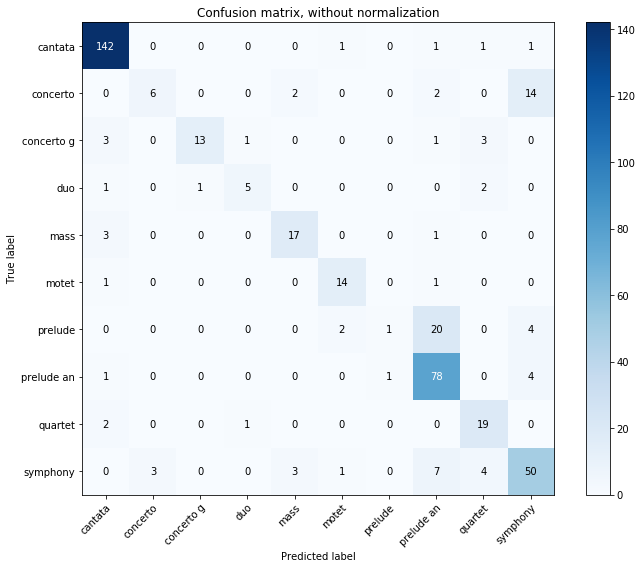

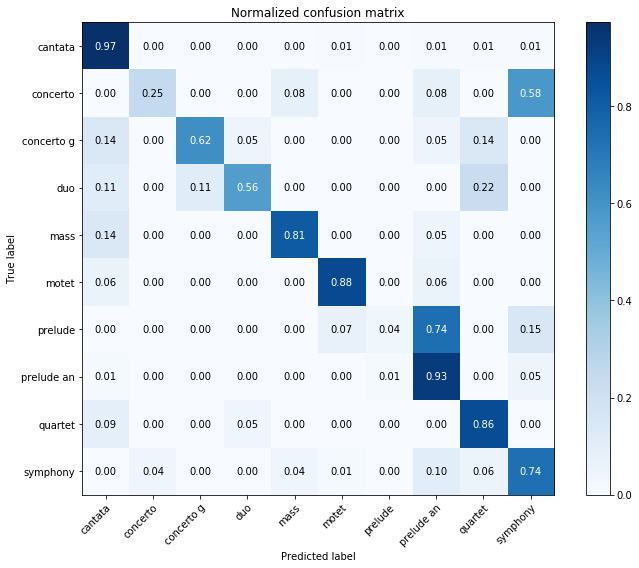

In [14]:
np.set_printoptions(precision=2)
plot_confusion_matrix(labels_1hot, predicted, classes=genres,
                      title='Confusion matrix, without normalization')
plot_confusion_matrix(labels_1hot, predicted, classes=genres, normalize=True,
                      title='Normalized confusion matrix')

### Experiment 2: Composer

In [15]:
composers = np.loadtxt('./dataset/composer.txt', dtype=np.str, delimiter=',')
np.unique(composers)

array(['Bach', 'Beethoven', 'Haydn', 'Mozart'], dtype='<U9')

In [16]:
labels_1hot = onehot_labels(composers)
num_output = labels_1hot.shape[1]

num_output

4

In [17]:
neural_network = KerasClassifier(build_fn=create_model, 
                                 epochs=100, 
                                 batch_size=32)

In [18]:
scores = cross_val_score(neural_network, data, labels_1hot, cv=10, verbose=0)
scores

Epoch 1/100
394/394 [==============================] - 0s 601us/sample - loss: 0.3851 - acc: 0.8261
Epoch 2/100
394/394 [==============================] - 0s 63us/sample - loss: 0.2986 - acc: 0.8871
Epoch 3/100
394/394 [==============================] - 0s 67us/sample - loss: 0.2832 - acc: 0.8928
Epoch 4/100
394/394 [==============================] - 0s 59us/sample - loss: 0.2550 - acc: 0.9055
Epoch 5/100
394/394 [==============================] - 0s 55us/sample - loss: 0.2496 - acc: 0.9042
Epoch 6/100
394/394 [==============================] - 0s 67us/sample - loss: 0.2429 - acc: 0.9055
Epoch 7/100
394/394 [==============================] - 0s 82us/sample - loss: 0.2393 - acc: 0.9118
Epoch 8/100
394/394 [==============================] - 0s 76us/sample - loss: 0.2375 - acc: 0.9061
Epoch 9/100
394/394 [==============================] - 0s 65us/sample - loss: 0.2453 - acc: 0.9042
Epoch 10/100
394/394 [==============================] - 0s 77us/sample - loss: 0.2210 - acc: 0.9055
Epoch 11

Epoch 83/100
394/394 [==============================] - 0s 48us/sample - loss: 0.1108 - acc: 0.9448
Epoch 84/100
394/394 [==============================] - 0s 50us/sample - loss: 0.1085 - acc: 0.9511
Epoch 85/100
394/394 [==============================] - 0s 51us/sample - loss: 0.1167 - acc: 0.9404
Epoch 86/100
394/394 [==============================] - 0s 54us/sample - loss: 0.1125 - acc: 0.9480
Epoch 87/100
394/394 [==============================] - 0s 49us/sample - loss: 0.1054 - acc: 0.9562
Epoch 88/100
394/394 [==============================] - 0s 50us/sample - loss: 0.1273 - acc: 0.9404
Epoch 89/100
394/394 [==============================] - 0s 49us/sample - loss: 0.1297 - acc: 0.9442
Epoch 90/100
394/394 [==============================] - 0s 48us/sample - loss: 0.1210 - acc: 0.9499
Epoch 91/100
394/394 [==============================] - 0s 50us/sample - loss: 0.1047 - acc: 0.9511
Epoch 92/100
394/394 [==============================] - 0s 53us/sample - loss: 0.1087 - acc: 0.9511


394/394 [==============================] - 0s 51us/sample - loss: 0.1494 - acc: 0.9378
Epoch 65/100
394/394 [==============================] - 0s 56us/sample - loss: 0.1424 - acc: 0.9346
Epoch 66/100
394/394 [==============================] - 0s 71us/sample - loss: 0.1318 - acc: 0.9404
Epoch 67/100
394/394 [==============================] - 0s 55us/sample - loss: 0.1208 - acc: 0.9448
Epoch 68/100
394/394 [==============================] - 0s 60us/sample - loss: 0.1319 - acc: 0.9454
Epoch 69/100
394/394 [==============================] - 0s 56us/sample - loss: 0.1386 - acc: 0.9454
Epoch 70/100
394/394 [==============================] - 0s 55us/sample - loss: 0.1430 - acc: 0.9442
Epoch 71/100
394/394 [==============================] - 0s 57us/sample - loss: 0.1478 - acc: 0.9289
Epoch 72/100
394/394 [==============================] - 0s 64us/sample - loss: 0.1249 - acc: 0.9416
Epoch 73/100
394/394 [==============================] - 0s 63us/sample - loss: 0.1425 - acc: 0.9346
Epoch 74/100


394/394 [==============================] - 0s 60us/sample - loss: 0.1391 - acc: 0.9391
Epoch 46/100
394/394 [==============================] - 0s 54us/sample - loss: 0.1341 - acc: 0.9404
Epoch 47/100
394/394 [==============================] - 0s 54us/sample - loss: 0.1300 - acc: 0.9429
Epoch 48/100
394/394 [==============================] - 0s 57us/sample - loss: 0.1330 - acc: 0.9423
Epoch 49/100
394/394 [==============================] - 0s 56us/sample - loss: 0.1241 - acc: 0.9429
Epoch 50/100
394/394 [==============================] - 0s 57us/sample - loss: 0.1270 - acc: 0.9435
Epoch 51/100
394/394 [==============================] - 0s 57us/sample - loss: 0.1286 - acc: 0.9480
Epoch 52/100
394/394 [==============================] - 0s 58us/sample - loss: 0.1275 - acc: 0.9423
Epoch 53/100
394/394 [==============================] - 0s 56us/sample - loss: 0.1342 - acc: 0.9378
Epoch 54/100
394/394 [==============================] - 0s 58us/sample - loss: 0.1237 - acc: 0.9442
Epoch 55/100


394/394 [==============================] - 0s 59us/sample - loss: 0.1434 - acc: 0.9334
Epoch 27/100
394/394 [==============================] - 0s 58us/sample - loss: 0.1524 - acc: 0.9251
Epoch 28/100
394/394 [==============================] - 0s 59us/sample - loss: 0.1688 - acc: 0.9232
Epoch 29/100
394/394 [==============================] - 0s 60us/sample - loss: 0.1528 - acc: 0.9245
Epoch 30/100
394/394 [==============================] - 0s 57us/sample - loss: 0.1449 - acc: 0.9302
Epoch 31/100
394/394 [==============================] - 0s 60us/sample - loss: 0.1422 - acc: 0.9321
Epoch 32/100
394/394 [==============================] - 0s 56us/sample - loss: 0.1469 - acc: 0.9315
Epoch 33/100
394/394 [==============================] - 0s 60us/sample - loss: 0.1659 - acc: 0.9220
Epoch 34/100
394/394 [==============================] - 0s 60us/sample - loss: 0.1440 - acc: 0.9308
Epoch 35/100
394/394 [==============================] - 0s 57us/sample - loss: 0.1470 - acc: 0.9340
Epoch 36/100


394/394 [==============================] - 0s 53us/sample - loss: 0.2670 - acc: 0.9004
Epoch 8/100
394/394 [==============================] - 0s 55us/sample - loss: 0.2550 - acc: 0.9029
Epoch 9/100
394/394 [==============================] - 0s 58us/sample - loss: 0.2402 - acc: 0.9061
Epoch 10/100
394/394 [==============================] - 0s 59us/sample - loss: 0.2229 - acc: 0.9099
Epoch 11/100
394/394 [==============================] - 0s 57us/sample - loss: 0.2094 - acc: 0.9093
Epoch 12/100
394/394 [==============================] - 0s 54us/sample - loss: 0.2136 - acc: 0.9099
Epoch 13/100
394/394 [==============================] - 0s 53us/sample - loss: 0.2062 - acc: 0.9086
Epoch 14/100
394/394 [==============================] - 0s 55us/sample - loss: 0.1959 - acc: 0.9175
Epoch 15/100
394/394 [==============================] - 0s 56us/sample - loss: 0.1823 - acc: 0.9188
Epoch 16/100
394/394 [==============================] - 0s 55us/sample - loss: 0.1914 - acc: 0.9137
Epoch 17/100
39

394/394 [==============================] - 0s 66us/sample - loss: 0.1016 - acc: 0.9549
Epoch 90/100
394/394 [==============================] - 0s 60us/sample - loss: 0.1101 - acc: 0.9524
Epoch 91/100
394/394 [==============================] - 0s 60us/sample - loss: 0.1008 - acc: 0.9562
Epoch 92/100
394/394 [==============================] - 0s 62us/sample - loss: 0.1131 - acc: 0.9486
Epoch 93/100
394/394 [==============================] - 0s 58us/sample - loss: 0.1157 - acc: 0.9467
Epoch 94/100
394/394 [==============================] - 0s 58us/sample - loss: 0.1371 - acc: 0.9404
Epoch 95/100
394/394 [==============================] - 0s 58us/sample - loss: 0.1020 - acc: 0.9569
Epoch 96/100
394/394 [==============================] - 0s 57us/sample - loss: 0.1154 - acc: 0.9492
Epoch 97/100
394/394 [==============================] - 0s 60us/sample - loss: 0.1112 - acc: 0.9499
Epoch 98/100
394/394 [==============================] - 0s 62us/sample - loss: 0.1077 - acc: 0.9594
Epoch 99/100


394/394 [==============================] - 0s 57us/sample - loss: 0.1446 - acc: 0.9346
Epoch 71/100
394/394 [==============================] - 0s 58us/sample - loss: 0.1307 - acc: 0.9429
Epoch 72/100
394/394 [==============================] - 0s 60us/sample - loss: 0.1362 - acc: 0.9365
Epoch 73/100
394/394 [==============================] - 0s 58us/sample - loss: 0.1392 - acc: 0.9334
Epoch 74/100
394/394 [==============================] - 0s 58us/sample - loss: 0.1338 - acc: 0.9391
Epoch 75/100
394/394 [==============================] - 0s 57us/sample - loss: 0.1308 - acc: 0.9334
Epoch 76/100
394/394 [==============================] - 0s 58us/sample - loss: 0.1284 - acc: 0.9416
Epoch 77/100
394/394 [==============================] - 0s 56us/sample - loss: 0.1343 - acc: 0.9391
Epoch 78/100
394/394 [==============================] - 0s 55us/sample - loss: 0.1613 - acc: 0.9239
Epoch 79/100
394/394 [==============================] - 0s 59us/sample - loss: 0.1612 - acc: 0.9296
Epoch 80/100


394/394 [==============================] - 0s 59us/sample - loss: 0.1579 - acc: 0.9277
Epoch 52/100
394/394 [==============================] - 0s 57us/sample - loss: 0.1574 - acc: 0.9289
Epoch 53/100
394/394 [==============================] - 0s 57us/sample - loss: 0.1408 - acc: 0.9372
Epoch 54/100
394/394 [==============================] - 0s 56us/sample - loss: 0.1396 - acc: 0.9397
Epoch 55/100
394/394 [==============================] - 0s 60us/sample - loss: 0.1347 - acc: 0.9397
Epoch 56/100
394/394 [==============================] - 0s 57us/sample - loss: 0.1547 - acc: 0.9264
Epoch 57/100
394/394 [==============================] - 0s 58us/sample - loss: 0.1503 - acc: 0.9397
Epoch 58/100
394/394 [==============================] - 0s 59us/sample - loss: 0.1410 - acc: 0.9391
Epoch 59/100
394/394 [==============================] - 0s 62us/sample - loss: 0.1337 - acc: 0.9448
Epoch 60/100
394/394 [==============================] - 0s 62us/sample - loss: 0.1288 - acc: 0.9461
Epoch 61/100


394/394 [==============================] - 0s 60us/sample - loss: 0.1443 - acc: 0.9315
Epoch 33/100
394/394 [==============================] - 0s 55us/sample - loss: 0.1414 - acc: 0.9372
Epoch 34/100
394/394 [==============================] - 0s 57us/sample - loss: 0.1416 - acc: 0.9359
Epoch 35/100
394/394 [==============================] - 0s 57us/sample - loss: 0.1638 - acc: 0.9239
Epoch 36/100
394/394 [==============================] - 0s 59us/sample - loss: 0.1555 - acc: 0.9220
Epoch 37/100
394/394 [==============================] - 0s 58us/sample - loss: 0.1482 - acc: 0.9353
Epoch 38/100
394/394 [==============================] - 0s 58us/sample - loss: 0.1490 - acc: 0.9302
Epoch 39/100
394/394 [==============================] - 0s 58us/sample - loss: 0.1310 - acc: 0.9448
Epoch 40/100
394/394 [==============================] - 0s 62us/sample - loss: 0.1338 - acc: 0.9372
Epoch 41/100
394/394 [==============================] - 0s 62us/sample - loss: 0.1450 - acc: 0.9346
Epoch 42/100


395/395 [==============================] - 0s 64us/sample - loss: 0.1950 - acc: 0.9082
Epoch 14/100
395/395 [==============================] - 0s 59us/sample - loss: 0.1895 - acc: 0.9108
Epoch 15/100
395/395 [==============================] - 0s 59us/sample - loss: 0.1843 - acc: 0.9228
Epoch 16/100
395/395 [==============================] - 0s 61us/sample - loss: 0.2053 - acc: 0.9076
Epoch 17/100
395/395 [==============================] - 0s 54us/sample - loss: 0.2211 - acc: 0.9032
Epoch 18/100
395/395 [==============================] - 0s 59us/sample - loss: 0.2065 - acc: 0.9114
Epoch 19/100
395/395 [==============================] - 0s 56us/sample - loss: 0.1922 - acc: 0.9133
Epoch 20/100
395/395 [==============================] - 0s 57us/sample - loss: 0.2138 - acc: 0.9038
Epoch 21/100
395/395 [==============================] - 0s 56us/sample - loss: 0.1815 - acc: 0.9171
Epoch 22/100
395/395 [==============================] - 0s 54us/sample - loss: 0.1718 - acc: 0.9209
Epoch 23/100


395/395 [==============================] - 0s 68us/sample - loss: 0.1362 - acc: 0.9405
Epoch 96/100
395/395 [==============================] - 0s 64us/sample - loss: 0.1249 - acc: 0.9456
Epoch 97/100
395/395 [==============================] - 0s 63us/sample - loss: 0.1144 - acc: 0.9551
Epoch 98/100
395/395 [==============================] - 0s 68us/sample - loss: 0.1291 - acc: 0.9437
Epoch 99/100
395/395 [==============================] - 0s 60us/sample - loss: 0.1335 - acc: 0.9373
Epoch 100/100
43/43 [==============================] - 0s 4ms/sample - loss: 0.0269 - acc: 0.9767
Epoch 1/100
395/395 [==============================] - 0s 678us/sample - loss: 0.4156 - acc: 0.8538
Epoch 2/100
395/395 [==============================] - 0s 59us/sample - loss: 0.3363 - acc: 0.8703
Epoch 3/100
395/395 [==============================] - 0s 55us/sample - loss: 0.3081 - acc: 0.8829
Epoch 4/100
395/395 [==============================] - 0s 57us/sample - loss: 0.3021 - acc: 0.8880
Epoch 5/100
395/39

395/395 [==============================] - 0s 52us/sample - loss: 0.1320 - acc: 0.9380
Epoch 77/100
395/395 [==============================] - 0s 52us/sample - loss: 0.1216 - acc: 0.9475
Epoch 78/100
395/395 [==============================] - 0s 56us/sample - loss: 0.1303 - acc: 0.9424
Epoch 79/100
395/395 [==============================] - 0s 51us/sample - loss: 0.1251 - acc: 0.9475
Epoch 80/100
395/395 [==============================] - 0s 56us/sample - loss: 0.1290 - acc: 0.9481
Epoch 81/100
395/395 [==============================] - 0s 54us/sample - loss: 0.1198 - acc: 0.9494
Epoch 82/100
395/395 [==============================] - 0s 51us/sample - loss: 0.1265 - acc: 0.9430
Epoch 83/100
395/395 [==============================] - 0s 54us/sample - loss: 0.1419 - acc: 0.9386
Epoch 84/100
395/395 [==============================] - 0s 53us/sample - loss: 0.1767 - acc: 0.9146
Epoch 85/100
395/395 [==============================] - 0s 51us/sample - loss: 0.1790 - acc: 0.9241
Epoch 86/100


array([0.89, 0.91, 0.94, 0.88, 0.91, 0.93, 0.98, 0.9 , 0.98, 1.  ])

In [19]:
score['composer'] = np.mean(scores)
np.mean(scores)

0.9323335111141204

In [20]:
neural_network.fit(data, labels_1hot, verbose=0)
predicted = neural_network.predict(data)

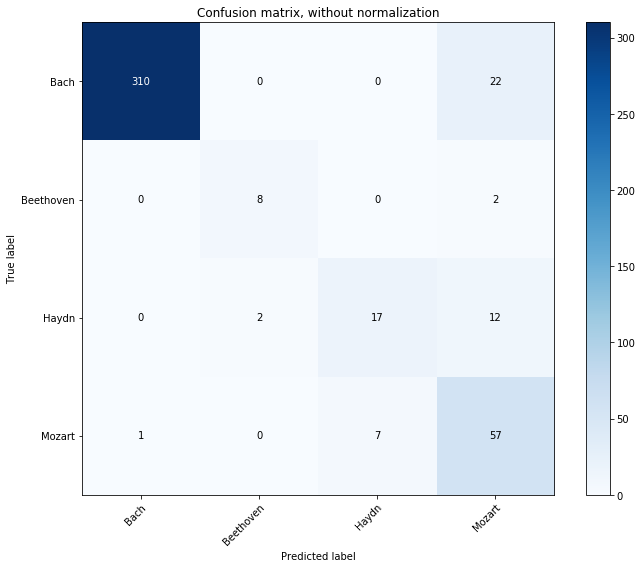

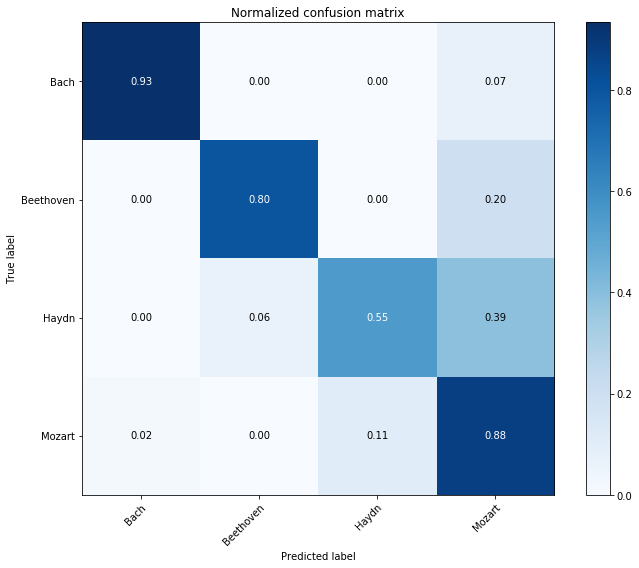

In [21]:
np.set_printoptions(precision=2)
plot_confusion_matrix(labels_1hot, predicted, classes=composers,
                      title='Confusion matrix, without normalization')
plot_confusion_matrix(labels_1hot, predicted, classes=composers, normalize=True,
                      title='Normalized confusion matrix')

### Experiment 3: Movement

In [22]:
mvt = np.loadtxt('./dataset/mvt.txt', dtype=np.str, delimiter=',')
uniq, count = np.unique(mvt, return_counts=True)
u = {}
for i, c in enumerate(uniq):
    u[c] = count[i]
    
u

{'?': 52,
 'Adagio': 11,
 'Affettuoso': 1,
 'Allegro': 53,
 'Andante': 21,
 'Aria': 51,
 'Choral': 44,
 'Credo': 1,
 'Crucifixus': 1,
 'Dona': 1,
 'Duetto': 8,
 'Et': 2,
 'Finale': 4,
 'Fugue': 48,
 'Gloria': 1,
 'Gratias': 1,
 'Kyrie': 2,
 'Menuet': 1,
 'Minuetto': 15,
 'Osanna': 1,
 'Patrem': 1,
 'Polacca': 1,
 'Prelude': 48,
 'Recitativo': 44,
 'Romanze': 1,
 'Rondeau': 6,
 'Sanctus': 1,
 'Scherzo': 1,
 'Sinfonia': 3,
 'Spiritoso': 1,
 'Trio': 2,
 'Versus': 8,
 'nan': 2}

In [23]:
enough_big = [(m!='?' and u[m] > 9) for m in mvt]

data_filtered = data[enough_big]
mvt_filtered = mvt[enough_big]
labels_1hot = onehot_labels(mvt_filtered)
num_output = labels_1hot.shape[1]
num_output

9

In [24]:
data_filtered.shape

(335, 100)

In [25]:
neural_network = KerasClassifier(build_fn=create_model, 
                                 epochs=100, 
                                 batch_size=32)

In [26]:
scores = cross_val_score(neural_network, data_filtered, labels_1hot, cv=10, verbose=0)
scores

Epoch 1/100
301/301 [==============================] - 0s 950us/sample - loss: 0.4220 - acc: 0.8726
Epoch 2/100
301/301 [==============================] - 0s 64us/sample - loss: 0.3502 - acc: 0.8889
Epoch 3/100
301/301 [==============================] - 0s 65us/sample - loss: 0.3363 - acc: 0.8889
Epoch 4/100
301/301 [==============================] - 0s 61us/sample - loss: 0.3268 - acc: 0.8907
Epoch 5/100
301/301 [==============================] - 0s 61us/sample - loss: 0.3207 - acc: 0.8944
Epoch 6/100
301/301 [==============================] - 0s 63us/sample - loss: 0.3165 - acc: 0.8929
Epoch 7/100
301/301 [==============================] - 0s 63us/sample - loss: 0.3108 - acc: 0.8933
Epoch 8/100
301/301 [==============================] - 0s 67us/sample - loss: 0.3099 - acc: 0.8944
Epoch 9/100
301/301 [==============================] - 0s 58us/sample - loss: 0.3048 - acc: 0.8941
Epoch 10/100
301/301 [==============================] - 0s 63us/sample - loss: 0.3018 - acc: 0.8926
Epoch 11

301/301 [==============================] - 0s 62us/sample - loss: 0.1963 - acc: 0.9033
Epoch 84/100
301/301 [==============================] - 0s 59us/sample - loss: 0.1809 - acc: 0.9136
Epoch 85/100
301/301 [==============================] - 0s 59us/sample - loss: 0.1650 - acc: 0.9203
Epoch 86/100
301/301 [==============================] - 0s 60us/sample - loss: 0.1685 - acc: 0.9140
Epoch 87/100
301/301 [==============================] - 0s 60us/sample - loss: 0.1671 - acc: 0.9192
Epoch 88/100
301/301 [==============================] - 0s 61us/sample - loss: 0.1592 - acc: 0.9221
Epoch 89/100
301/301 [==============================] - 0s 63us/sample - loss: 0.1700 - acc: 0.9195
Epoch 90/100
301/301 [==============================] - 0s 61us/sample - loss: 0.1704 - acc: 0.9240
Epoch 91/100
301/301 [==============================] - 0s 58us/sample - loss: 0.1716 - acc: 0.9188
Epoch 92/100
301/301 [==============================] - 0s 60us/sample - loss: 0.1656 - acc: 0.9184
Epoch 93/100


301/301 [==============================] - 0s 66us/sample - loss: 0.2013 - acc: 0.9081
Epoch 65/100
301/301 [==============================] - 0s 64us/sample - loss: 0.1894 - acc: 0.9070
Epoch 66/100
301/301 [==============================] - 0s 66us/sample - loss: 0.1906 - acc: 0.9092
Epoch 67/100
301/301 [==============================] - 0s 62us/sample - loss: 0.1863 - acc: 0.9129
Epoch 68/100
301/301 [==============================] - 0s 61us/sample - loss: 0.2004 - acc: 0.9029
Epoch 69/100
301/301 [==============================] - 0s 62us/sample - loss: 0.1893 - acc: 0.9110
Epoch 70/100
301/301 [==============================] - 0s 58us/sample - loss: 0.1868 - acc: 0.9062
Epoch 71/100
301/301 [==============================] - 0s 64us/sample - loss: 0.1824 - acc: 0.9136
Epoch 72/100
301/301 [==============================] - 0s 65us/sample - loss: 0.2192 - acc: 0.8996
Epoch 73/100
301/301 [==============================] - 0s 63us/sample - loss: 0.2003 - acc: 0.9059
Epoch 74/100


301/301 [==============================] - 0s 59us/sample - loss: 0.2060 - acc: 0.9092
Epoch 46/100
301/301 [==============================] - 0s 62us/sample - loss: 0.2060 - acc: 0.9037
Epoch 47/100
301/301 [==============================] - 0s 67us/sample - loss: 0.2053 - acc: 0.9037
Epoch 48/100
301/301 [==============================] - 0s 59us/sample - loss: 0.1994 - acc: 0.9088
Epoch 49/100
301/301 [==============================] - 0s 63us/sample - loss: 0.2077 - acc: 0.9025
Epoch 50/100
301/301 [==============================] - 0s 58us/sample - loss: 0.1988 - acc: 0.9110
Epoch 51/100
301/301 [==============================] - 0s 63us/sample - loss: 0.1935 - acc: 0.9066
Epoch 52/100
301/301 [==============================] - 0s 58us/sample - loss: 0.1922 - acc: 0.9110
Epoch 53/100
301/301 [==============================] - 0s 60us/sample - loss: 0.1996 - acc: 0.9073
Epoch 54/100
301/301 [==============================] - 0s 60us/sample - loss: 0.2171 - acc: 0.8985
Epoch 55/100


301/301 [==============================] - 0s 66us/sample - loss: 0.2532 - acc: 0.8959
Epoch 27/100
301/301 [==============================] - 0s 68us/sample - loss: 0.2509 - acc: 0.8926
Epoch 28/100
301/301 [==============================] - 0s 66us/sample - loss: 0.2484 - acc: 0.8937
Epoch 29/100
301/301 [==============================] - 0s 68us/sample - loss: 0.2418 - acc: 0.8929
Epoch 30/100
301/301 [==============================] - 0s 67us/sample - loss: 0.2392 - acc: 0.8974
Epoch 31/100
301/301 [==============================] - 0s 61us/sample - loss: 0.2364 - acc: 0.8985
Epoch 32/100
301/301 [==============================] - 0s 62us/sample - loss: 0.2327 - acc: 0.8941
Epoch 33/100
301/301 [==============================] - 0s 64us/sample - loss: 0.2281 - acc: 0.8996
Epoch 34/100
301/301 [==============================] - 0s 67us/sample - loss: 0.2296 - acc: 0.8963
Epoch 35/100
301/301 [==============================] - 0s 70us/sample - loss: 0.2264 - acc: 0.8985
Epoch 36/100


301/301 [==============================] - 0s 71us/sample - loss: 0.3140 - acc: 0.8893
Epoch 8/100
301/301 [==============================] - 0s 69us/sample - loss: 0.3135 - acc: 0.8926
Epoch 9/100
301/301 [==============================] - 0s 70us/sample - loss: 0.3109 - acc: 0.8926
Epoch 10/100
301/301 [==============================] - 0s 71us/sample - loss: 0.3073 - acc: 0.8911
Epoch 11/100
301/301 [==============================] - 0s 70us/sample - loss: 0.3060 - acc: 0.8918
Epoch 12/100
301/301 [==============================] - 0s 70us/sample - loss: 0.3030 - acc: 0.8922
Epoch 13/100
301/301 [==============================] - 0s 75us/sample - loss: 0.3000 - acc: 0.8918
Epoch 14/100
301/301 [==============================] - 0s 75us/sample - loss: 0.2949 - acc: 0.8922
Epoch 15/100
301/301 [==============================] - 0s 73us/sample - loss: 0.2919 - acc: 0.8918
Epoch 16/100
301/301 [==============================] - 0s 77us/sample - loss: 0.2887 - acc: 0.8922
Epoch 17/100
30

301/301 [==============================] - 0s 65us/sample - loss: 0.1576 - acc: 0.9251
Epoch 90/100
301/301 [==============================] - 0s 65us/sample - loss: 0.1671 - acc: 0.9188
Epoch 91/100
301/301 [==============================] - 0s 64us/sample - loss: 0.1616 - acc: 0.9276
Epoch 92/100
301/301 [==============================] - 0s 68us/sample - loss: 0.1589 - acc: 0.9232
Epoch 93/100
301/301 [==============================] - 0s 59us/sample - loss: 0.1579 - acc: 0.9228
Epoch 94/100
301/301 [==============================] - 0s 61us/sample - loss: 0.1616 - acc: 0.9195
Epoch 95/100
301/301 [==============================] - 0s 64us/sample - loss: 0.1601 - acc: 0.9265
Epoch 96/100
301/301 [==============================] - 0s 64us/sample - loss: 0.1527 - acc: 0.9291
Epoch 97/100
301/301 [==============================] - 0s 73us/sample - loss: 0.1502 - acc: 0.9317
Epoch 98/100
301/301 [==============================] - 0s 65us/sample - loss: 0.1530 - acc: 0.9225
Epoch 99/100


302/302 [==============================] - 0s 70us/sample - loss: 0.1714 - acc: 0.9165
Epoch 71/100
302/302 [==============================] - 0s 73us/sample - loss: 0.1695 - acc: 0.9180
Epoch 72/100
302/302 [==============================] - 0s 73us/sample - loss: 0.1721 - acc: 0.9191
Epoch 73/100
302/302 [==============================] - 0s 73us/sample - loss: 0.1746 - acc: 0.9143
Epoch 74/100
302/302 [==============================] - 0s 73us/sample - loss: 0.1670 - acc: 0.9216
Epoch 75/100
302/302 [==============================] - 0s 72us/sample - loss: 0.1664 - acc: 0.9216
Epoch 76/100
302/302 [==============================] - 0s 67us/sample - loss: 0.1630 - acc: 0.9176
Epoch 77/100
302/302 [==============================] - 0s 70us/sample - loss: 0.1800 - acc: 0.9128
Epoch 78/100
302/302 [==============================] - 0s 66us/sample - loss: 0.1664 - acc: 0.9213
Epoch 79/100
302/302 [==============================] - 0s 68us/sample - loss: 0.1630 - acc: 0.9198
Epoch 80/100


302/302 [==============================] - 0s 65us/sample - loss: 0.2139 - acc: 0.9014
Epoch 52/100
302/302 [==============================] - 0s 66us/sample - loss: 0.2042 - acc: 0.9102
Epoch 53/100
302/302 [==============================] - 0s 59us/sample - loss: 0.2043 - acc: 0.9051
Epoch 54/100
302/302 [==============================] - 0s 72us/sample - loss: 0.2153 - acc: 0.9007
Epoch 55/100
302/302 [==============================] - 0s 73us/sample - loss: 0.1984 - acc: 0.9062
Epoch 56/100
302/302 [==============================] - 0s 75us/sample - loss: 0.2022 - acc: 0.9032
Epoch 57/100
302/302 [==============================] - 0s 79us/sample - loss: 0.2029 - acc: 0.9029
Epoch 58/100
302/302 [==============================] - 0s 75us/sample - loss: 0.1994 - acc: 0.9069
Epoch 59/100
302/302 [==============================] - 0s 85us/sample - loss: 0.1988 - acc: 0.9069
Epoch 60/100
302/302 [==============================] - 0s 78us/sample - loss: 0.1924 - acc: 0.9091
Epoch 61/100


302/302 [==============================] - 0s 59us/sample - loss: 0.2336 - acc: 0.8948
Epoch 33/100
302/302 [==============================] - 0s 64us/sample - loss: 0.2344 - acc: 0.8926
Epoch 34/100
302/302 [==============================] - 0s 63us/sample - loss: 0.2355 - acc: 0.8962
Epoch 35/100
302/302 [==============================] - 0s 62us/sample - loss: 0.2311 - acc: 0.8974
Epoch 36/100
302/302 [==============================] - 0s 61us/sample - loss: 0.2276 - acc: 0.8999
Epoch 37/100
302/302 [==============================] - 0s 69us/sample - loss: 0.2239 - acc: 0.8999
Epoch 38/100
302/302 [==============================] - 0s 64us/sample - loss: 0.2227 - acc: 0.8966
Epoch 39/100
302/302 [==============================] - 0s 69us/sample - loss: 0.2305 - acc: 0.8962
Epoch 40/100
302/302 [==============================] - 0s 66us/sample - loss: 0.2257 - acc: 0.8988
Epoch 41/100
302/302 [==============================] - 0s 73us/sample - loss: 0.2252 - acc: 0.8992
Epoch 42/100


302/302 [==============================] - 0s 65us/sample - loss: 0.3101 - acc: 0.8904
Epoch 14/100
302/302 [==============================] - 0s 64us/sample - loss: 0.3043 - acc: 0.8940
Epoch 15/100
302/302 [==============================] - 0s 64us/sample - loss: 0.3014 - acc: 0.8922
Epoch 16/100
302/302 [==============================] - 0s 63us/sample - loss: 0.3010 - acc: 0.8915
Epoch 17/100
302/302 [==============================] - 0s 61us/sample - loss: 0.2972 - acc: 0.8940
Epoch 18/100
302/302 [==============================] - 0s 64us/sample - loss: 0.2938 - acc: 0.8940
Epoch 19/100
302/302 [==============================] - 0s 63us/sample - loss: 0.2912 - acc: 0.8929
Epoch 20/100
302/302 [==============================] - 0s 62us/sample - loss: 0.2852 - acc: 0.8918
Epoch 21/100
302/302 [==============================] - 0s 66us/sample - loss: 0.2825 - acc: 0.8933
Epoch 22/100
302/302 [==============================] - 0s 65us/sample - loss: 0.2807 - acc: 0.8940
Epoch 23/100


302/302 [==============================] - 0s 76us/sample - loss: 0.1709 - acc: 0.9216
Epoch 96/100
302/302 [==============================] - 0s 72us/sample - loss: 0.1628 - acc: 0.9272
Epoch 97/100
302/302 [==============================] - 0s 75us/sample - loss: 0.1696 - acc: 0.9220
Epoch 98/100
302/302 [==============================] - 0s 72us/sample - loss: 0.1728 - acc: 0.9194
Epoch 99/100
302/302 [==============================] - 0s 78us/sample - loss: 0.1648 - acc: 0.9242
Epoch 100/100
33/33 [==============================] - 0s 8ms/sample - loss: 0.2019 - acc: 0.8754
Epoch 1/100
302/302 [==============================] - 0s 1ms/sample - loss: 0.4519 - acc: 0.8216
Epoch 2/100
302/302 [==============================] - 0s 69us/sample - loss: 0.3490 - acc: 0.8889
Epoch 3/100
302/302 [==============================] - 0s 57us/sample - loss: 0.3365 - acc: 0.8889
Epoch 4/100
302/302 [==============================] - 0s 62us/sample - loss: 0.3292 - acc: 0.8889
Epoch 5/100
302/302 

302/302 [==============================] - 0s 70us/sample - loss: 0.1674 - acc: 0.9187
Epoch 77/100
302/302 [==============================] - 0s 76us/sample - loss: 0.1679 - acc: 0.9235
Epoch 78/100
302/302 [==============================] - 0s 73us/sample - loss: 0.1693 - acc: 0.9209
Epoch 79/100
302/302 [==============================] - 0s 72us/sample - loss: 0.1688 - acc: 0.9202
Epoch 80/100
302/302 [==============================] - 0s 64us/sample - loss: 0.1733 - acc: 0.9161
Epoch 81/100
302/302 [==============================] - 0s 65us/sample - loss: 0.1964 - acc: 0.9073
Epoch 82/100
302/302 [==============================] - 0s 75us/sample - loss: 0.1701 - acc: 0.9216
Epoch 83/100
302/302 [==============================] - 0s 87us/sample - loss: 0.1739 - acc: 0.9198
Epoch 84/100
302/302 [==============================] - 0s 91us/sample - loss: 0.1799 - acc: 0.9187
Epoch 85/100
302/302 [==============================] - 0s 90us/sample - loss: 0.1664 - acc: 0.9238
Epoch 86/100


array([0.89, 0.93, 0.92, 0.92, 0.9 , 0.9 , 0.9 , 0.88, 0.88, 0.89])

In [27]:
score['mvt'] = np.mean(scores)
score['mvt']

0.8996534049510956

In [28]:
neural_network.fit(data_filtered, labels_1hot, verbose=0)
predicted = neural_network.predict(data_filtered)

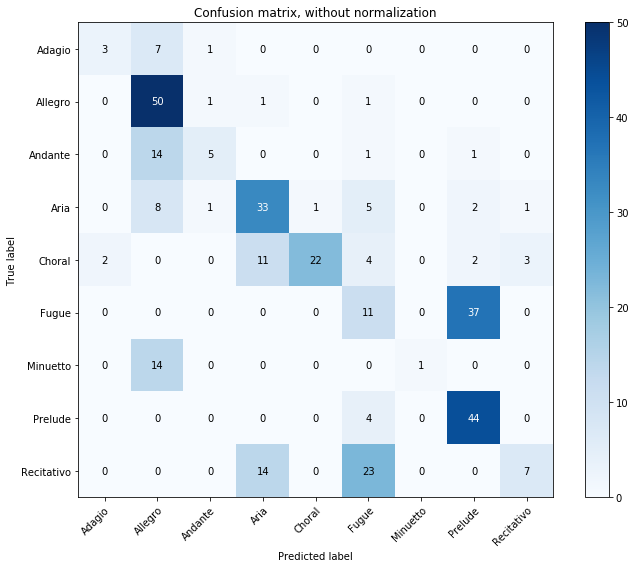

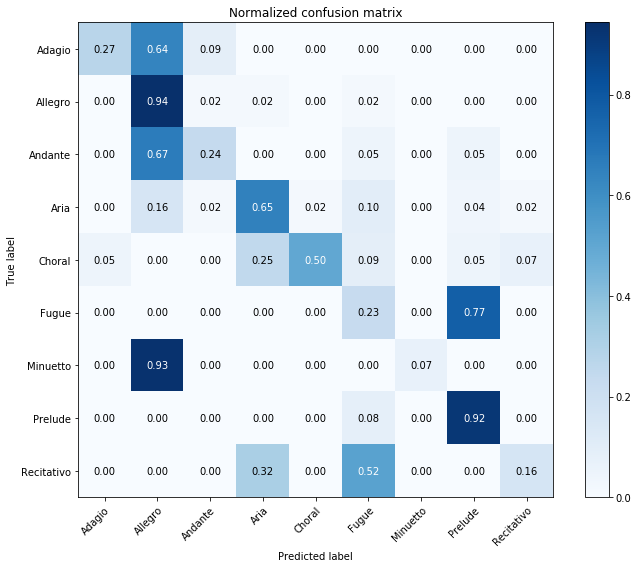

In [29]:
np.set_printoptions(precision=2)
plot_confusion_matrix(labels_1hot, predicted, classes=mvt_filtered,
                      title='Confusion matrix, without normalization')
plot_confusion_matrix(labels_1hot, predicted, classes=mvt_filtered, normalize=True,
                      title='Normalized confusion matrix')

### Experiment 4: Instrument

In [30]:
instrument = np.loadtxt('./dataset/instrument.txt', dtype=np.str, delimiter=',')
uniq, count = np.unique(instrument, return_counts=True)
u = {}
for i, c in enumerate(uniq):
    u[c] = count[i]
u

{'?': 21,
 'I': 36,
 'I+P': 2,
 'O': 155,
 'O+S': 30,
 'O+V': 51,
 'P': 123,
 'P+V': 1,
 'V': 19}

In [31]:
enough_big = [(m!='?' and u[m] > 9) for m in instrument]

data_filtered = data[enough_big]
instrument_filtered = instrument[enough_big]
labels_1hot = onehot_labels(instrument_filtered)
num_output = labels_1hot.shape[1]
num_output

6

In [32]:
neural_network = KerasClassifier(build_fn=create_model, 
                                 epochs=100, 
                                 batch_size=32)

In [33]:
neural_network.fit(data_filtered, labels_1hot, verbose=0)
predicted = neural_network.predict(data_filtered)

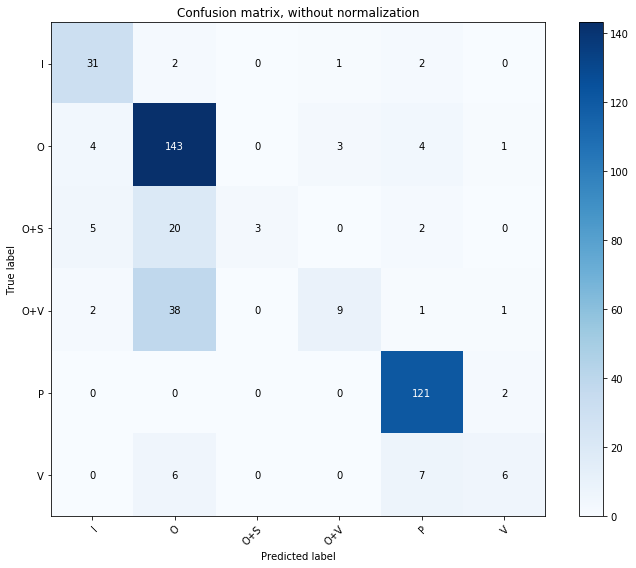

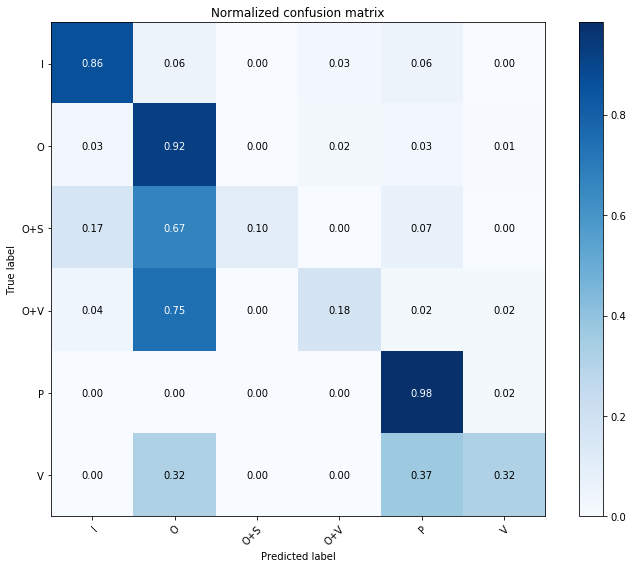

In [34]:
np.set_printoptions(precision=2)
plot_confusion_matrix(labels_1hot, predicted, classes=instrument_filtered,
                      title='Confusion matrix, without normalization')
plot_confusion_matrix(labels_1hot, predicted, classes=instrument_filtered, normalize=True,
                      title='Normalized confusion matrix')

In [35]:
scores = cross_val_score(neural_network, data_filtered, labels_1hot, cv=10, verbose=0)
scores

Epoch 1/100
372/372 [==============================] - 0s 1ms/sample - loss: 0.4644 - acc: 0.7809
Epoch 2/100
372/372 [==============================] - 0s 71us/sample - loss: 0.4085 - acc: 0.8333
Epoch 3/100
372/372 [==============================] - 0s 73us/sample - loss: 0.4022 - acc: 0.8333
Epoch 4/100
372/372 [==============================] - 0s 69us/sample - loss: 0.3914 - acc: 0.8342
Epoch 5/100
372/372 [==============================] - 0s 76us/sample - loss: 0.3847 - acc: 0.8347
Epoch 6/100
372/372 [==============================] - 0s 72us/sample - loss: 0.3719 - acc: 0.8392
Epoch 7/100
372/372 [==============================] - 0s 73us/sample - loss: 0.3643 - acc: 0.8436
Epoch 8/100
372/372 [==============================] - 0s 73us/sample - loss: 0.3571 - acc: 0.8548
Epoch 9/100
372/372 [==============================] - 0s 74us/sample - loss: 0.3398 - acc: 0.8598
Epoch 10/100
372/372 [==============================] - 0s 72us/sample - loss: 0.3228 - acc: 0.8701
Epoch 11/1

372/372 [==============================] - 0s 64us/sample - loss: 0.1899 - acc: 0.9158
Epoch 84/100
372/372 [==============================] - 0s 69us/sample - loss: 0.2059 - acc: 0.9077
Epoch 85/100
372/372 [==============================] - 0s 65us/sample - loss: 0.2093 - acc: 0.9055
Epoch 86/100
372/372 [==============================] - 0s 70us/sample - loss: 0.2073 - acc: 0.9126
Epoch 87/100
372/372 [==============================] - 0s 65us/sample - loss: 0.1968 - acc: 0.9162
Epoch 88/100
372/372 [==============================] - 0s 70us/sample - loss: 0.1934 - acc: 0.9144
Epoch 89/100
372/372 [==============================] - 0s 68us/sample - loss: 0.1880 - acc: 0.9144
Epoch 90/100
372/372 [==============================] - 0s 64us/sample - loss: 0.1925 - acc: 0.9140
Epoch 91/100
372/372 [==============================] - 0s 65us/sample - loss: 0.1984 - acc: 0.9122
Epoch 92/100
372/372 [==============================] - 0s 68us/sample - loss: 0.1991 - acc: 0.9108
Epoch 93/100


372/372 [==============================] - 0s 63us/sample - loss: 0.1841 - acc: 0.9167
Epoch 65/100
372/372 [==============================] - 0s 65us/sample - loss: 0.1961 - acc: 0.9167
Epoch 66/100
372/372 [==============================] - 0s 64us/sample - loss: 0.2003 - acc: 0.9140
Epoch 67/100
372/372 [==============================] - 0s 62us/sample - loss: 0.1825 - acc: 0.9265
Epoch 68/100
372/372 [==============================] - 0s 67us/sample - loss: 0.1854 - acc: 0.9180
Epoch 69/100
372/372 [==============================] - 0s 67us/sample - loss: 0.1890 - acc: 0.9144
Epoch 70/100
372/372 [==============================] - 0s 61us/sample - loss: 0.1896 - acc: 0.9211
Epoch 71/100
372/372 [==============================] - 0s 62us/sample - loss: 0.1786 - acc: 0.9207
Epoch 72/100
372/372 [==============================] - 0s 71us/sample - loss: 0.1793 - acc: 0.9185
Epoch 73/100
372/372 [==============================] - 0s 82us/sample - loss: 0.1866 - acc: 0.9180
Epoch 74/100


372/372 [==============================] - 0s 67us/sample - loss: 0.2199 - acc: 0.9108
Epoch 46/100
372/372 [==============================] - 0s 71us/sample - loss: 0.2108 - acc: 0.9055
Epoch 47/100
372/372 [==============================] - 0s 68us/sample - loss: 0.2103 - acc: 0.9050
Epoch 48/100
372/372 [==============================] - 0s 70us/sample - loss: 0.2127 - acc: 0.9014
Epoch 49/100
372/372 [==============================] - 0s 69us/sample - loss: 0.2075 - acc: 0.9082
Epoch 50/100
372/372 [==============================] - 0s 68us/sample - loss: 0.1981 - acc: 0.9104
Epoch 51/100
372/372 [==============================] - 0s 67us/sample - loss: 0.2052 - acc: 0.9064
Epoch 52/100
372/372 [==============================] - 0s 67us/sample - loss: 0.1981 - acc: 0.9059
Epoch 53/100
372/372 [==============================] - 0s 70us/sample - loss: 0.2043 - acc: 0.9082
Epoch 54/100
372/372 [==============================] - 0s 65us/sample - loss: 0.2014 - acc: 0.9144
Epoch 55/100


372/372 [==============================] - 0s 69us/sample - loss: 0.2329 - acc: 0.9028
Epoch 27/100
372/372 [==============================] - 0s 70us/sample - loss: 0.2361 - acc: 0.9001
Epoch 28/100
372/372 [==============================] - 0s 67us/sample - loss: 0.2394 - acc: 0.8956
Epoch 29/100
372/372 [==============================] - 0s 70us/sample - loss: 0.2329 - acc: 0.8996
Epoch 30/100
372/372 [==============================] - 0s 69us/sample - loss: 0.2324 - acc: 0.9005
Epoch 31/100
372/372 [==============================] - 0s 69us/sample - loss: 0.2342 - acc: 0.8996
Epoch 32/100
372/372 [==============================] - 0s 67us/sample - loss: 0.2220 - acc: 0.9019
Epoch 33/100
372/372 [==============================] - 0s 68us/sample - loss: 0.2233 - acc: 0.9019
Epoch 34/100
372/372 [==============================] - 0s 69us/sample - loss: 0.2290 - acc: 0.8996
Epoch 35/100
372/372 [==============================] - 0s 70us/sample - loss: 0.2379 - acc: 0.8974
Epoch 36/100


373/373 [==============================] - 0s 69us/sample - loss: 0.3602 - acc: 0.8436
Epoch 8/100
373/373 [==============================] - 0s 64us/sample - loss: 0.3520 - acc: 0.8517
Epoch 9/100
373/373 [==============================] - 0s 65us/sample - loss: 0.3418 - acc: 0.8557
Epoch 10/100
373/373 [==============================] - 0s 63us/sample - loss: 0.3299 - acc: 0.8548
Epoch 11/100
373/373 [==============================] - 0s 66us/sample - loss: 0.3250 - acc: 0.8615
Epoch 12/100
373/373 [==============================] - 0s 64us/sample - loss: 0.3424 - acc: 0.8597
Epoch 13/100
373/373 [==============================] - 0s 71us/sample - loss: 0.3301 - acc: 0.8552
Epoch 14/100
373/373 [==============================] - 0s 63us/sample - loss: 0.3068 - acc: 0.8749
Epoch 15/100
373/373 [==============================] - 0s 65us/sample - loss: 0.2903 - acc: 0.8780
Epoch 16/100
373/373 [==============================] - 0s 67us/sample - loss: 0.2772 - acc: 0.8856
Epoch 17/100
37

373/373 [==============================] - 0s 75us/sample - loss: 0.1905 - acc: 0.9147
Epoch 90/100
373/373 [==============================] - 0s 80us/sample - loss: 0.1965 - acc: 0.9164
Epoch 91/100
373/373 [==============================] - 0s 86us/sample - loss: 0.1899 - acc: 0.9164
Epoch 92/100
373/373 [==============================] - 0s 80us/sample - loss: 0.1850 - acc: 0.9164
Epoch 93/100
373/373 [==============================] - 0s 83us/sample - loss: 0.1803 - acc: 0.9147
Epoch 94/100
373/373 [==============================] - 0s 99us/sample - loss: 0.1811 - acc: 0.9191
Epoch 95/100
373/373 [==============================] - 0s 92us/sample - loss: 0.1958 - acc: 0.9075
Epoch 96/100
373/373 [==============================] - 0s 88us/sample - loss: 0.2031 - acc: 0.9115
Epoch 97/100
373/373 [==============================] - 0s 82us/sample - loss: 0.2117 - acc: 0.9102
Epoch 98/100
373/373 [==============================] - 0s 75us/sample - loss: 0.1959 - acc: 0.9120
Epoch 99/100


373/373 [==============================] - 0s 94us/sample - loss: 0.1981 - acc: 0.9097
Epoch 71/100
373/373 [==============================] - 0s 82us/sample - loss: 0.2040 - acc: 0.9075
Epoch 72/100
373/373 [==============================] - 0s 84us/sample - loss: 0.1900 - acc: 0.9155
Epoch 73/100
373/373 [==============================] - 0s 79us/sample - loss: 0.1909 - acc: 0.9155
Epoch 74/100
373/373 [==============================] - 0s 86us/sample - loss: 0.1896 - acc: 0.9142
Epoch 75/100
373/373 [==============================] - 0s 75us/sample - loss: 0.1942 - acc: 0.9124
Epoch 76/100
373/373 [==============================] - 0s 81us/sample - loss: 0.1931 - acc: 0.9151
Epoch 77/100
373/373 [==============================] - 0s 79us/sample - loss: 0.1896 - acc: 0.9173
Epoch 78/100
373/373 [==============================] - 0s 74us/sample - loss: 0.1931 - acc: 0.9084
Epoch 79/100
373/373 [==============================] - 0s 77us/sample - loss: 0.1833 - acc: 0.9196
Epoch 80/100


373/373 [==============================] - 0s 67us/sample - loss: 0.2110 - acc: 0.9008
Epoch 52/100
373/373 [==============================] - 0s 70us/sample - loss: 0.2071 - acc: 0.9120
Epoch 53/100
373/373 [==============================] - 0s 67us/sample - loss: 0.2079 - acc: 0.9084
Epoch 54/100
373/373 [==============================] - 0s 70us/sample - loss: 0.2066 - acc: 0.9039
Epoch 55/100
373/373 [==============================] - 0s 66us/sample - loss: 0.1974 - acc: 0.9155
Epoch 56/100
373/373 [==============================] - 0s 63us/sample - loss: 0.2107 - acc: 0.9053
Epoch 57/100
373/373 [==============================] - 0s 65us/sample - loss: 0.2016 - acc: 0.9066
Epoch 58/100
373/373 [==============================] - 0s 69us/sample - loss: 0.2006 - acc: 0.9111
Epoch 59/100
373/373 [==============================] - 0s 65us/sample - loss: 0.1986 - acc: 0.9138
Epoch 60/100
373/373 [==============================] - 0s 66us/sample - loss: 0.2069 - acc: 0.9071
Epoch 61/100


373/373 [==============================] - 0s 77us/sample - loss: 0.2387 - acc: 0.8972
Epoch 33/100
373/373 [==============================] - 0s 78us/sample - loss: 0.2368 - acc: 0.9030
Epoch 34/100
373/373 [==============================] - 0s 85us/sample - loss: 0.2295 - acc: 0.9017
Epoch 35/100
373/373 [==============================] - 0s 80us/sample - loss: 0.2470 - acc: 0.8977
Epoch 36/100
373/373 [==============================] - 0s 81us/sample - loss: 0.2491 - acc: 0.8941
Epoch 37/100
373/373 [==============================] - 0s 72us/sample - loss: 0.2329 - acc: 0.8981
Epoch 38/100
373/373 [==============================] - 0s 78us/sample - loss: 0.2450 - acc: 0.8995
Epoch 39/100
373/373 [==============================] - 0s 65us/sample - loss: 0.2347 - acc: 0.8963
Epoch 40/100
373/373 [==============================] - 0s 63us/sample - loss: 0.2295 - acc: 0.8995
Epoch 41/100
373/373 [==============================] - 0s 68us/sample - loss: 0.2243 - acc: 0.9057
Epoch 42/100


373/373 [==============================] - 0s 67us/sample - loss: 0.3007 - acc: 0.8695
Epoch 14/100
373/373 [==============================] - 0s 67us/sample - loss: 0.2985 - acc: 0.8704
Epoch 15/100
373/373 [==============================] - 0s 66us/sample - loss: 0.2966 - acc: 0.8700
Epoch 16/100
373/373 [==============================] - 0s 63us/sample - loss: 0.2767 - acc: 0.8852
Epoch 17/100
373/373 [==============================] - 0s 66us/sample - loss: 0.2726 - acc: 0.8870
Epoch 18/100
373/373 [==============================] - 0s 67us/sample - loss: 0.2626 - acc: 0.8905
Epoch 19/100
373/373 [==============================] - 0s 67us/sample - loss: 0.2766 - acc: 0.8829
Epoch 20/100
373/373 [==============================] - 0s 65us/sample - loss: 0.2707 - acc: 0.8798
Epoch 21/100
373/373 [==============================] - 0s 65us/sample - loss: 0.2633 - acc: 0.8905
Epoch 22/100
373/373 [==============================] - 0s 64us/sample - loss: 0.2697 - acc: 0.8829
Epoch 23/100


373/373 [==============================] - 0s 66us/sample - loss: 0.1974 - acc: 0.9053
Epoch 96/100
373/373 [==============================] - 0s 66us/sample - loss: 0.1961 - acc: 0.9129
Epoch 97/100
373/373 [==============================] - 0s 72us/sample - loss: 0.2025 - acc: 0.9066
Epoch 98/100
373/373 [==============================] - 0s 72us/sample - loss: 0.2628 - acc: 0.8843
Epoch 99/100
373/373 [==============================] - 0s 78us/sample - loss: 0.2261 - acc: 0.8950
Epoch 100/100
41/41 [==============================] - 0s 7ms/sample - loss: 0.2156 - acc: 0.9146
Epoch 1/100
373/373 [==============================] - 0s 1ms/sample - loss: 0.4543 - acc: 0.8021
Epoch 2/100
373/373 [==============================] - 0s 58us/sample - loss: 0.4004 - acc: 0.8365
Epoch 3/100
373/373 [==============================] - 0s 57us/sample - loss: 0.3963 - acc: 0.8338
Epoch 4/100
373/373 [==============================] - 0s 55us/sample - loss: 0.3853 - acc: 0.8414
Epoch 5/100
373/373 

373/373 [==============================] - 0s 64us/sample - loss: 0.2030 - acc: 0.8995
Epoch 77/100
373/373 [==============================] - 0s 61us/sample - loss: 0.2064 - acc: 0.9088
Epoch 78/100
373/373 [==============================] - 0s 57us/sample - loss: 0.1973 - acc: 0.9071
Epoch 79/100
373/373 [==============================] - 0s 57us/sample - loss: 0.1906 - acc: 0.9102
Epoch 80/100
373/373 [==============================] - 0s 62us/sample - loss: 0.1946 - acc: 0.9124
Epoch 81/100
373/373 [==============================] - 0s 59us/sample - loss: 0.1963 - acc: 0.9147
Epoch 82/100
373/373 [==============================] - 0s 60us/sample - loss: 0.2020 - acc: 0.8941
Epoch 83/100
373/373 [==============================] - 0s 55us/sample - loss: 0.1982 - acc: 0.9106
Epoch 84/100
373/373 [==============================] - 0s 61us/sample - loss: 0.1998 - acc: 0.9088
Epoch 85/100
373/373 [==============================] - 0s 60us/sample - loss: 0.1889 - acc: 0.9124
Epoch 86/100


array([0.83, 0.85, 0.86, 0.87, 0.88, 0.87, 0.89, 0.9 , 0.91, 0.95])

In [36]:
score['instrument'] = np.mean(scores)

In [37]:
score

{'composer': 0.9323335111141204,
 'genre': 0.9324200749397278,
 'instrument': 0.8827332496643067,
 'mvt': 0.8996534049510956}